# Initial preprocesig and modelling

# New Section

In [ ]:
import re
import pandas as pd
import pickle
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

In [ ]:
def data_prep(spe):
 print("Reading dataset: ", spe)
 qi = open("/content/drive/MyDrive/BTP/" + spe + "_res.fold" , "r")
 text = qi.read()
 qi.close()

 print("\nCalculating features...\n")
 matchA = re.findall("[(.][.)(]+[.)]", str(text))
 matchB = re.findall(r"^[AUGC]{10,}", str(text), flags=re.MULTILINE)
 df02 = pd.DataFrame(matchA, matchB)
 df02 = df02.reset_index()
 df02.columns = ["sequence", "fold"]
 s2 = pd.read_csv("/content/drive/MyDrive/BTP/" + spe + "_stats.csv", sep='\t')
 s2 = s2.fillna(0)
 s2 = s2.iloc[:, :-1]
 scon = pd.concat([s2], axis=1)
 scon = scon[pd.to_numeric(scon.iloc[:, 0], errors='coerce').notnull()]
 scon = scon.astype(float)
 scon = pd.concat([scon, df02], axis=1)
 scon.rename(columns={"Nmfe": "dG"}, inplace=True)
 scon["stem"] = scon["fold"].str.extract('(\(.*\))')
 scon["nstem"] = scon["stem"].apply(len)
 scon["stemte"] = scon["fold"].str.findall('(\(\.+\))')
 scon["nstemte"] = scon["stemte"].apply(len)
 scon["stemte"] = scon["fold"].str.extract('(\(\.+\))')
 scon["lenstemte"] = scon["stemte"].apply(len)

 scon["MFE1"] = scon["dG"] / scon["%G+C"]
 scon["stem0"] = scon["fold"].str.findall('(\({3,})')
 scon["n_stems"] = scon["stem0"].apply(len)
 scon["stem1"] = scon["fold"].str.findall('(\()')
 scon["total_base"] = scon["stem1"].apply(len)
 scon["MFE2"] = scon["dG"] / scon["n_stems"]
 scon["MFE3"] = scon["dG"] / scon["nstemte"]
 scon["MFE4"] = scon["dG"] / scon["total_base"]
 scon["avg_bp"] = scon["total_base"] / scon["n_stems"]

 scon1 = scon[
  ["Len", "A", "C", "G", "U", "G+C", "A+U", "AA", "AC", "AG", "AU", "CA",
   "CC",
   "CG",
   "CU", "GA", "GC", "GG", "GU", "UA", "UC", "UG", "UU", "%A", "%C", "%G", "%U", "%G+C", "%A+U", "%AA", "%AC",
   "%AG",
   "%AU", "%CA", "%CC", "%CG", "%CU", "%GA", "%GC", "%GG", "%GU", "%UA", "%UC", "%UG", "%UU", "pb", "Npb",
   "mfe",
   "dG", "Q", "NQ", "D", "ND", "nstem", "MFE1", "MFE2", "MFE3", "MFE4", "total_base", "n_stems", "avg_bp"]]

 b = scon[["sequence", "Len", "mfe", "fold", "avg_bp"]]
 scon1 = scon1.abs()
 return scon1


In [ ]:
mammalia = data_prep(spe="mammalia").abs()
rice = data_prep(spe="monocot").abs()
rodent = data_prep(spe="rodent").abs()
rumin = data_prep(spe="rumin").abs()
sauria = data_prep(spe="sauria").abs()
teleo = data_prep(spe="teleo").abs()
human = data_prep(spe="human").abs()
virus = data_prep(spe="virus").abs()
insect = data_prep(spe= "insect").abs()
aves = data_prep(spe= "aves").abs()

Reading dataset:  mammalia

Calculating features...

Reading dataset:  monocot

Calculating features...

Reading dataset:  rodent

Calculating features...

Reading dataset:  rumin

Calculating features...

Reading dataset:  sauria

Calculating features...

Reading dataset:  teleo

Calculating features...

Reading dataset:  human

Calculating features...

Reading dataset:  virus

Calculating features...

Reading dataset:  insect

Calculating features...

Reading dataset:  aves

Calculating features...



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mammalia.loc[:, 'SEQ'] = int(0)
rice.loc[:, 'SEQ'] = int(1)
rodent.loc[:, 'SEQ'] = int(2)
rumin.loc[:, 'SEQ'] = int(3)
sauria.loc[:, 'SEQ'] = int(4)
insect.loc[:, 'SEQ'] = int(5)
human.loc[:, 'SEQ'] = int(6)
aves.loc[:, 'SEQ'] = int(7)

In [ ]:
dataset = pd.concat([mammalia, rice, rodent, rumin, sauria, insect, human, aves])

dataset['SEQ'].value_counts().sort_index()

0     502
1     910
2    1580
3    1064
4     606
5    3855
6    1916
7    1381
Name: SEQ, dtype: int64

In [ ]:
dataset.columns

Index(['Len', 'A', 'C', 'G', 'U', 'G+C', 'A+U', 'AA', 'AC', 'AG', 'AU', 'CA',
       'CC', 'CG', 'CU', 'GA', 'GC', 'GG', 'GU', 'UA', 'UC', 'UG', 'UU', '%A',
       '%C', '%G', '%U', '%G+C', '%A+U', '%AA', '%AC', '%AG', '%AU', '%CA',
       '%CC', '%CG', '%CU', '%GA', '%GC', '%GG', '%GU', '%UA', '%UC', '%UG',
       '%UU', 'pb', 'Npb', 'mfe', 'dG', 'Q', 'NQ', 'D', 'ND', 'nstem', 'MFE1',
       'MFE2', 'MFE3', 'MFE4', 'total_base', 'n_stems', 'avg_bp', 'SEQ'],
      dtype='object')

In [ ]:
test = dataset.iloc[:, -1]
train = dataset.iloc[:,:-1]

In [ ]:
train.shape , test.shape

((11814, 61), (11814,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train,test,random_state = 42,test_size=0.1)

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

In [ ]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_sample(X_test, y_test .ravel())

In [ ]:
y_train.value_counts()/len(y_train)*100

5    32.853649
6    16.158766
2    13.243040
7    11.709932
3     8.916479
1     7.825433
4     5.088412
0     4.204289
Name: SEQ, dtype: float64

In [ ]:
y_test.value_counts()/len(y_test)*100

5    30.626058
6    16.751269
2    14.551607
7    11.505922
3     9.813875
1     6.598985
4     5.499154
0     4.653130
Name: SEQ, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
cor = dataset.corr()


In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(train[useful])
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


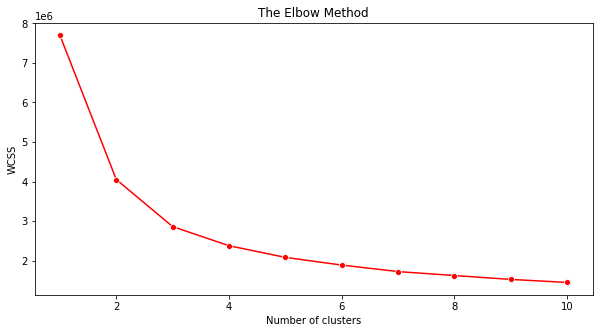

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(train[useful])

In [ ]:
y_kmeans

array([3, 3, 0, ..., 1, 3, 3], dtype=int32)

In [ ]:
test.to_numpy()

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_kmeans,test)

0.33488854328667705

In [ ]:
columns = cor['SEQ'][(cor["SEQ"] > 0.05) | (cor['SEQ']<-0.05)].index

In [ ]:
columns = columns.drop('SEQ')

In [ ]:
columns

Index(['Len', 'A', 'C', 'G', 'U', 'G+C', 'A+U', 'AA', 'AC', 'AG', 'AU', 'CA',
       'CG', 'CU', 'GA', 'GC', 'GU', 'UA', 'UC', 'UG', 'UU', '%U', '%AG',
       '%AU', '%CC', '%CG', '%GC', '%GG', '%UG', 'pb', 'Npb', 'mfe', 'dG', 'Q',
       'NQ', 'D', 'nstem', 'MFE1', 'MFE2', 'MFE3', 'MFE4', 'total_base',
       'n_stems', 'avg_bp'],
      dtype='object')

In [ ]:
non_useful = [col for col in train.columns if col not in columns]

In [ ]:
non_useful

['CC',
 'GG',
 '%A',
 '%C',
 '%G',
 '%G+C',
 '%A+U',
 '%AA',
 '%AC',
 '%CA',
 '%CU',
 '%GA',
 '%GU',
 '%UA',
 '%UC',
 '%UU',
 'ND']

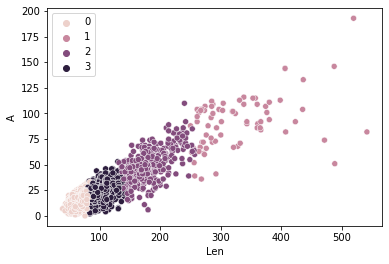

In [ ]:
sns.scatterplot(x='Len',y='A',data=train,hue=y_kmeans)

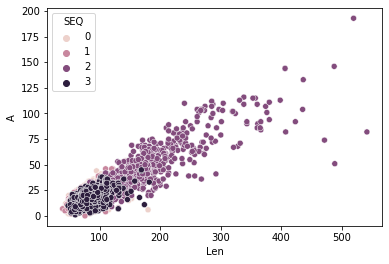

In [ ]:
sns.scatterplot(x='Len',y='A',data=train,hue=test)


In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.7 MB/s 
     |████████████████████████████████| 133 kB 47.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=a372923ddda9e314cec8ced9ccdc04cc6f411dd1fb0678bd2723542222784123
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
import xgboost as xgb
params = {'lambda': 6.020325421308473, 'alpha': 0.39501840564315227, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.016, 'n_estimators': 112, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 1}
rf= xgb.XGBClassifier(**params)
rf.fit(X_train,y_train)
perm = PermutationImportance(rf, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = train.columns.tolist())

Weight,Feature
0.0469 ± 0.0145,%CG
0.0325 ± 0.0185,CG
0.0133 ± 0.0085,%G+C
0.0114 ± 0.0105,Len
0.0103 ± 0.0105,dG
0.0101 ± 0.0047,Npb
0.0101 ± 0.0060,%AG
0.0085 ± 0.0023,MFE4
0.0073 ± 0.0099,%AU
0.0050 ± 0.0072,%GC


In [ ]:
i = list(perm.feature_importances_)
c = train.columns.to_list()
im = pd.DataFrame(data=[i,c]).T.sort_values(by=0,ascending=False,ignore_index=True)
im

In [ ]:
features = im.loc[:41,1].values

In [ ]:
features

array(['%CG', 'CG', '%G+C', 'Len', 'dG', 'Npb', '%AG', 'MFE4', '%AU',
       '%GC', 'MFE2', '%GU', '%U', 'AU', 'GC', 'AG', 'CA', 'C', 'Q',
       '%GA', '%UU', '%C', '%GG', 'A+U', 'U', 'GU', '%UG', 'pb', 'D',
       '%UA', 'G+C', 'AA', 'MFE1', '%CC', 'avg_bp', 'CU', 'mfe', '%AC',
       'UC', 'A', 'nstem', 'GA'], dtype=object)

In [ ]:
columns

Index(['Len', 'A', 'C', 'G', 'U', 'G+C', 'A+U', 'AA', 'AC', 'AG', 'AU', 'CA',
       'CG', 'CU', 'GA', 'GC', 'GU', 'UA', 'UC', 'UG', 'UU', '%U', '%AG',
       '%AU', '%CC', '%CG', '%GC', '%GG', '%UG', 'pb', 'Npb', 'mfe', 'dG', 'Q',
       'NQ', 'D', 'nstem', 'MFE1', 'MFE2', 'MFE3', 'MFE4', 'total_base',
       'n_stems', 'avg_bp'],
      dtype='object')

In [ ]:
useful = [col for col in columns if col not in new_columns]

In [ ]:
len(useful)

18

In [ ]:
useful

['A',
 'A+U',
 'AA',
 'AC',
 'AG',
 'CA',
 'CU',
 'GU',
 'UA',
 '%U',
 '%GC',
 '%GG',
 'dG',
 'Q',
 'NQ',
 'D',
 'n_stems',
 'avg_bp']

In [ ]:
for col in new_columns:
    if (col not in columns):
        print(col)

%GU
%C
%UA
%CU
%GA
%AC
%G
CC
%A
%CA
%A+U
%AA
%UC


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20,random_state=42)
pca_data = pca.fit_transform(X_resampled)
pca_test = pca.transform(X_test)

In [ ]:
new_X_train = np.concatenate([X_resampled.values,pca_data],axis=1)
new_X_test = np.concatenate([X_test.values,pca_test],axis=1)

In [ ]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 6.2 MB/s 
     |████████████████████████████████| 209 kB 12.2 MB/s 
     |████████████████████████████████| 81 kB 7.4 MB/s 
     |████████████████████████████████| 78 kB 6.3 MB/s 
     |████████████████████████████████| 112 kB 54.4 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 147 kB 55.5 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=4a2d040b71d1e565834e1a10fc948ad4d82f69e0e9fc8f7c6ef869ee4bc01496
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna
from sklearn.metrics import accuracy_score
import xgboost as xgb
def objective(trial,data=train,target=test):
    
    # train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.1,random_state=42)
    param = {
        'tree_method':'gpu_hist',
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': trial.suggest_int('n_estimators', 50, 400), 
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
        'random_state': trial.suggest_categorical('random_state', [42]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'objective':'multi:softmax',
        'num_class':8
    }
    model = xgb.XGBClassifier(**param)  
    model.fit(new_X_train,y_resampled,eval_set=[(new_X_test,y_test)],early_stopping_rounds=100,verbose=False)
    preds = model.predict(new_X_test)
    # model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    # preds = model.predict(test_x)
    
    accuracy = accuracy_score(y_test, preds)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-11-02 08:39:33,191] A new study created in memory with name: no-name-59fc92bf-8f20-4ab3-8223-d3b09ea994d4
[I 2022-11-02 08:39:54,567] Trial 0 finished with value: 0.5321489001692047 and parameters: {'lambda': 6.810421304650375, 'alpha': 2.479926694884646, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.02, 'n_estimators': 391, 'max_depth': 15, 'random_state': 42, 'min_child_weight': 161}. Best is trial 0 with value: 0.5321489001692047.
[I 2022-11-02 08:40:13,096] Trial 1 finished with value: 0.538917089678511 and parameters: {'lambda': 0.007043561823824295, 'alpha': 0.20196567765639264, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'n_estimators': 268, 'max_depth': 9, 'random_state': 42, 'min_child_weight': 124}. Best is trial 1 with value: 0.538917089678511.
[I 2022-11-02 08:40:58,051] Trial 2 finished with value: 0.6015228426395939 and parameters: {'lambda': 3.7052732792345875, 'alpha': 1.1014165840113364, 'colsample_bytree': 0.7, 'subsample

Number of finished trials: 30
Best trial: {'lambda': 3.7052732792345875, 'alpha': 1.1014165840113364, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.018, 'n_estimators': 333, 'max_depth': 11, 'random_state': 42, 'min_child_weight': 6}


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

param = {'tree_method':'gpu_hist','lambda': 3.7052732792345875, 'alpha': 1.1014165840113364, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.018, 'n_estimators': 333, 'max_depth': 11, 'random_state': 42, 'min_child_weight': 6}
model = xgb.XGBClassifier(**param)  
    
model.fit(new_X_train,y_resampled)
preds = model.predict(new_X_test)

accuracy = accuracy_score(y_test, preds)
accuracy

0.5981387478849408

In [ ]:
param = {'tree_method':'gpu_hist','lambda': 0.0011700696464475215, 'alpha': 0.006404103458455473, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.012, 'n_estimators': 157, 'max_depth': 17, 'random_state': 42, 'min_child_weight': 2}
model = xgb.XGBClassifier(**param)  
    
model.fit(new_X_train,y_resampled,eval_set=[(new_X_test,y_test)],early_stopping_rounds=100,verbose = False)
preds = model.predict(new_X_test)

accuracy = accuracy_score(y_test, preds)
accuracy

0.5930626057529611

In [ ]:
param
parameters = pd.DataFrame(param.values(),index = param.keys(),columns=['Values'])
parameters

,Values
tree_method,gpu_hist
lambda,3.705273
alpha,1.101417
colsample_bytree,0.7
subsample,0.4
learning_rate,0.018
n_estimators,333
max_depth,11
random_state,42
min_child_weight,6


0.5981387478849408
              precision    recall  f1-score   support

           0       0.40      0.35      0.37        55
           1       0.66      0.73      0.69        78
           2       0.48      0.40      0.44       172
           3       0.40      0.31      0.35       116
           4       0.57      0.80      0.67        65
           5       0.78      0.85      0.81       362
           6       0.54      0.55      0.54       198
           7       0.46      0.43      0.45       136

    accuracy                           0.60      1182
   macro avg       0.54      0.55      0.54      1182
weighted avg       0.58      0.60      0.59      1182



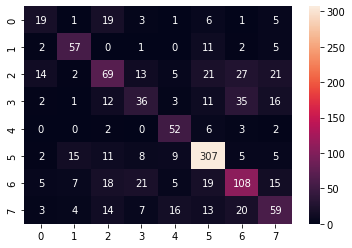

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns


print(accuracy_score(y_test, preds))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, preds))

In [ ]:
y_test.value_counts()

5    362
6    198
2    172
7    136
3    116
1     78
4     65
0     55
Name: SEQ, dtype: int64

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
sensitivity =TP/(TP+FN)
specificity = TN/(TN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*precision*recall/(precision + recall)
MCC = ((TP*TN) + (FP*FN))/np.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))

In [ ]:
sensitivity,specificity,precision,recall,f1_score,MCC,ACC

(array([0.84313725, 0.84473684, 0.56603774, 0.63043478, 0.9675    ,
        0.80417755, 0.5799458 , 0.56790123]),
 array([0.96823617, 0.9785503 , 0.9495024 , 0.95949926, 0.96497765,
        0.95372084, 0.95359116, 0.96155282]),
 array([0.8018648 , 0.8469657 , 0.60518732, 0.67836257, 0.8045738 ,
        0.7113164 , 0.62941176, 0.69069069]),
 array([0.84313725, 0.84473684, 0.56603774, 0.63043478, 0.9675    ,
        0.80417755, 0.5799458 , 0.56790123]),
 array([0.82198327, 0.8458498 , 0.58495822, 0.65352113, 0.87854711,
        0.75490196, 0.60366714, 0.62330623]),
 array([0.80414513, 0.83088841, 0.57584755, 0.63994433, 0.86558358,
        0.73669492, 0.59328226, 0.61236159]),
 array([0.95168612, 0.96206226, 0.90337224, 0.92023346, 0.9653048 ,
        0.93514916, 0.90888457, 0.90985733]))

In [ ]:
index = ['Sensitivity','Specificity','Precision','F1_Score','MCC','Accuracy']
columns = ['Mammalias', 'Rice', 'Rodent', 'Rumin', 'Sauria', 'Insect', 'Human', 'Aves']
df = pd.DataFrame([sensitivity,specificity,precision,f1_score,MCC,ACC],index=index,columns=columns)
df

,Mammalias,Rice,Rodent,Rumin,Sauria,Insect,Human,Aves
Sensitivity,0.345455,0.730769,0.401163,0.310345,0.800000,0.848066,0.545455,0.433824
Specificity,0.975155,0.972826,0.924752,0.950281,0.965085,0.893902,0.905488,0.934034
Precision,0.404255,0.655172,0.475862,0.404494,0.571429,0.779188,0.537313,0.460938
F1_Score,0.372549,0.690909,0.435331,0.351220,0.666667,0.812169,0.541353,0.446970
MCC,0.380659,0.682853,0.447181,0.371165,0.666218,0.757021,0.533655,0.454440
Accuracy,0.945854,0.956853,0.848562,0.887479,0.956007,0.879865,0.845178,0.876481


In [ ]:
model.save_model('/content/drive/MyDrive/BTP/xgb.json')

In [ ]:
import pickle

pickle.dump(model, open("/content/drive/MyDrive/BTP/xgb.sav", "wb"))
xgb = pickle.load(open("/content/drive/MyDrive/BTP/xgb.sav", "rb"))


In [ ]:
accuracy_score(xgb.predict(new_X_test),y_test)

0.6647597254004577

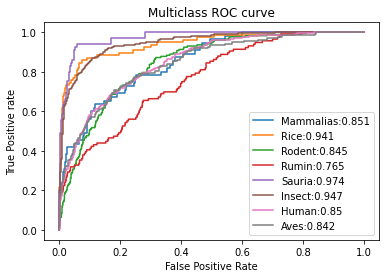

In [ ]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr = {}
tpr = {}
thresh ={}
n_class = 8
pred_prob = model.predict_proba(new_X_test)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc = auc(fpr[i],tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='-', label='{}:{}'.format(columns[i],round(roc_auc,3)))
# plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label='Mammalia vs Rest')
# plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label='Rice vs Rest')
# plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Rodent vs Rest')
# plt.plot(fpr[3], tpr[3], linestyle='-',color='red', label='Rumin vs Rest')
# plt.plot(fpr[4], tpr[4], linestyle='-',color='brown', label='Sauria vs Rest')
# plt.plot(fpr[5], tpr[5], linestyle='-',color='magenta', label='Insect vs Rest')
# plt.plot(fpr[6], tpr[6], linestyle='-',color='cyan', label='Human vs Rest')
# plt.plot(fpr[7], tpr[7], linestyle='-',color='purple', label='Aves vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=500);  

In [ ]:
import optuna
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
def objective(trial,data=train,target=test):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.1,random_state=42)
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 400),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 15),        
    }
    model = RandomForestClassifier(**param)  
    
    model.fit(train_x,train_y)
    preds = model.predict(test_x)
    
    accuracy = accuracy_score(test_y, preds)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-10-28 14:43:20,914] A new study created in memory with name: no-name-3a480982-40dc-4e48-a79d-91195296755b
[I 2022-10-28 14:43:25,028] Trial 0 finished with value: 0.6430205949656751 and parameters: {'n_estimators': 268, 'max_depth': 5, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.6430205949656751.
[I 2022-10-28 14:43:25,589] Trial 1 finished with value: 0.6018306636155606 and parameters: {'n_estimators': 54, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.6430205949656751.
[I 2022-10-28 14:43:26,350] Trial 2 finished with value: 0.6006864988558352 and parameters: {'n_estimators': 75, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.6430205949656751.
[I 2022-10-28 14:43:29,135] Trial 3 finished with value: 0.6693363844393593 and parameters: {'n_estimators': 81, 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 3 with value: 0

Number of finished trials: 30
Best trial: {'n_estimators': 134, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2}


In [ ]:
{'n_estimators': 231, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 3}

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
def objective(trial,data=train ,target=test):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
    param = {}
    param['iterations']= trial.suggest_int('iterations', 50, 300)
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
    param['depth'] = trial.suggest_int('depth', 9, 15)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
    model2 = CatBoostClassifier(**param)  
    model2.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=True)
    
    preds = model2.predict(test_x)
    accuracy = accuracy_score(test_y, preds)

    return accuracy
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

In [ ]:
from lightgbm import LGBMClassifier
import optuna
from sklearn.metrics import accuracy_score

def objective(trial,data=train ,target=test):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
    param = {
          # this parameter means using the GPU when training our model to speedup the training process
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 1000,
        'num_leaves': trial.suggest_int('num_leaves', 34, 300),
        'min_child_samples':trial.suggest_int('min_child_samples', 100, 500),
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = LGBMClassifier(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    accuracy = accuracy_score(test_y, preds)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-10-28 12:54:48,741] A new study created in memory with name: no-name-97190bde-670d-4ede-b208-e5f835a9a12f
[I 2022-10-28 12:54:57,726] Trial 0 finished with value: 0.6742987979393246 and parameters: {'reg_lambda': 0.3594501370055152, 'reg_alpha': 0.12769528129109878, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.016, 'num_leaves': 187, 'min_child_samples': 498, 'max_depth': 7, 'random_state': 48, 'min_child_weight': 44}. Best is trial 0 with value: 0.6742987979393246.
[I 2022-10-28 12:55:12,341] Trial 1 finished with value: 0.6754436176302232 and parameters: {'reg_lambda': 0.5598299300523025, 'reg_alpha': 1.9878042213601834, 'colsample_bytree': 1.0, 'subsample': 0.4, 'learning_rate': 0.014, 'num_leaves': 213, 'min_child_samples': 312, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 127}. Best is trial 1 with value: 0.6754436176302232.
[I 2022-10-28 12:55:24,488] Trial 2 finished with value: 0.6720091585575272 and parameters: {'reg_lambda': 0.0011546244658

Number of finished trials: 20
Best trial: {'reg_lambda': 9.716150942358874, 'reg_alpha': 0.007685506499754665, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.009, 'num_leaves': 292, 'min_child_samples': 232, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 7}


In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Input


In [ ]:
n_inputs = 61

input_data_shape= Input(shape=(n_inputs,))

encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)

encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)

n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(encoder)

decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [ ]:
output = Dense(n_inputs, activation='relu')(decoder)

model = Model(inputs=input_data_shape, outputs=output)

model.compile(optimizer='adam',loss='mse')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min',patience = 5)
history = model.fit(X_resampled, X_resampled, epochs=50, batch_size=16, validation_data=(X_test,X_test),callbacks=[es])

Epoch 1/50
1747/1747 [==============================] - 19s 9ms/step - loss: 132.2820 - val_loss: 8.1980
Epoch 2/50
1747/1747 [==============================] - 14s 8ms/step - loss: 14.6115 - val_loss: 5.8288
Epoch 3/50
1747/1747 [==============================] - 9s 5ms/step - loss: 13.1081 - val_loss: 6.5462
Epoch 4/50
1747/1747 [==============================] - 8s 5ms/step - loss: 11.7093 - val_loss: 5.9237
Epoch 5/50
1747/1747 [==============================] - 9s 5ms/step - loss: 10.8630 - val_loss: 4.7997
Epoch 6/50
1747/1747 [==============================] - 9s 5ms/step - loss: 9.9646 - val_loss: 6.3121
Epoch 7/50
1747/1747 [==============================] - 8s 5ms/step - loss: 9.3521 - val_loss: 4.0253
Epoch 8/50
1747/1747 [==============================] - 9s 5ms/step - loss: 9.2288 - val_loss: 5.8348
Epoch 9/50
1747/1747 [==============================] - 8s 5ms/step - loss: 8.5044 - val_loss: 4.5011
Epoch 10/50
1747/1747 [==============================] - 8s 5ms/step - los

In [ ]:
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
X_train_encoder = encoder.predict(X_resampled)
X_test_encoder = encoder.predict(X_test)

37/37 [==============================] - 0s 1ms/step


In [ ]:
new_X_train = np.concatenate([X_resampled.values,pca_data,X_train_encoder],axis=1)
new_X_test = np.concatenate([X_test.values,pca_test,X_test_encoder],axis=1)

In [ ]:
new_X_train_2 = np.concatenate([X_train.values,pca_data,X_train_encoder],axis=1)
new_X_test_2 = np.concatenate([X_test.values,pca_test,X_test_encoder],axis=1)

In [ ]:
bottleneck

<KerasTensor: shape=(None, 30) dtype=float32 (created by layer 'dense_2')>